In [ ]:
# HI 2022: Module #11
# Fall 2024
# Final-Project

In [ ]:
import kagglehub #importing kaggle

# Download latest version (code copied from kaggle)
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.18k/6.18k [00:00<00:00, 9.47MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2


In [ ]:
import pandas as pd

# using the path to the kaggle dataset
file_path = path + "/heart.csv"  # Construct the full file path

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Dataset shape
print("\nDataset shape (rows, columns):", df.shape)

# Dataset information
print("\nDataset info:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Basic statistics of numeric columns
print("\nBasic statistics of the dataset:")
print(df.describe())

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset shape (rows, columns): (1025, 14)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   

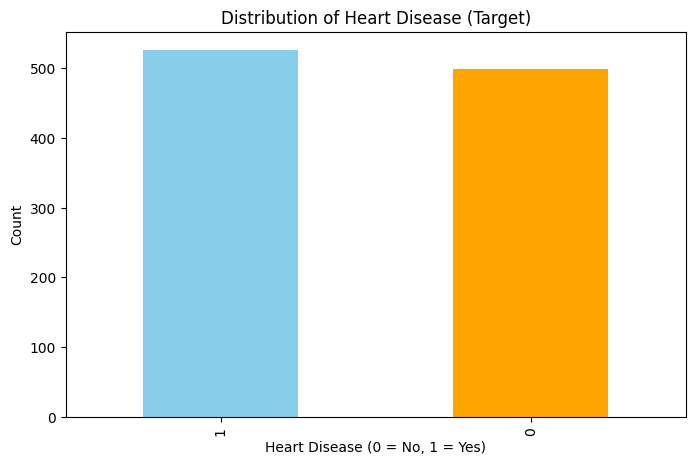

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart: Distribution of target (heart disease presence)
plt.figure(figsize=(8, 5))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribution of Heart Disease (Target)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()



In [ ]:
# Scatter Plot: Age vs. Maximum Heart Rate Achieved
#plt.figure(figsize=(8, 5))
#sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette="viridis")
#plt.title("Age vs. Maximum Heart Rate Achieved")
#plt.xlabel("Age")
#plt.ylabel("Maximum Heart Rate Achieved")
#plt.legend(title="Target")
#plt.show()



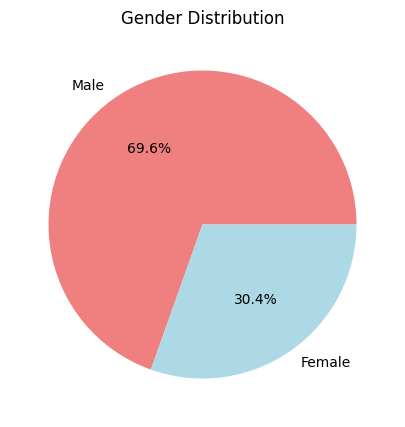

In [ ]:
# Pie Chart: Gender Distribution
plt.figure(figsize=(8, 5))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=["Male", "Female"], colors=['lightcoral', 'lightblue'])
plt.title("Gender Distribution")
plt.ylabel("")  # Hide the y-axis label
plt.show()




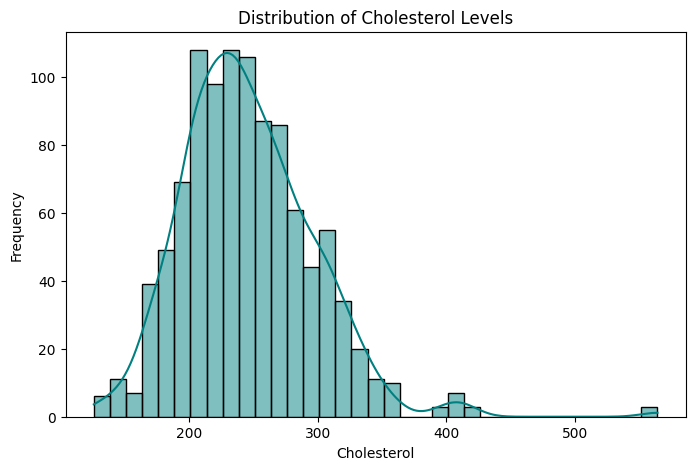

In [ ]:
#Histogram: Distribution of Cholesterol Levels
plt.figure(figsize=(8, 5))
sns.histplot(df['chol'], kde=True, color='teal')
plt.title("Distribution of Cholesterol Levels")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Example ML model
from google.colab import drive  # For Google Drive access

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Load the Dataset
file_path = '/content/drive/My Drive/heart.csv'  # Adjust the path if necessary
data = pd.read_csv(file_path)

# Step 3: Feature Selection
# Features: 'restecg', 'chol', 'fbs'
X = data[['restecg', 'chol', 'fbs']]
# Target: 'target' (0 = no heart disease, 1 = heart disease)
y = data['target']

# Step 4: Data Normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 5: K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)  # Example model

# Evaluate the model using K-Fold Cross Validation
scores = cross_val_score(model, X_normalized, y, cv=kf, scoring='accuracy')

# Print the results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Mounted at /content/drive
Cross-Validation Scores: [0.8195122  0.88292683 0.84878049 0.83414634 0.82439024]
Mean Accuracy: 0.8419512195121952


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from google.colab import drive  # For Google Drive access

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Load the Dataset
file_path = '/content/drive/My Drive/heart.csv'  # Adjust the path if necessary
data = pd.read_csv(file_path)

# Step 3: Feature Selection
X = data[['restecg', 'chol', 'fbs']]  # Features: 'restecg', 'chol', 'fbs'
y = data['target']                    # Target: 0 = no heart disease, 1 = heart disease

# Step 4: Data Normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Step 6: Train Models
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

# Step 7: Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation Metrics for {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (per class):", precision_score(y_true, y_pred, average=None))
    print("Recall (per class):", recall_score(y_true, y_pred, average=None))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate Decision Tree
evaluate_model(y_test, dt_y_pred, "Decision Tree")

# Evaluate Naïve Bayes
evaluate_model(y_test, nb_y_pred, "Naïve Bayes")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Evaluation Metrics for Decision Tree
Accuracy: 0.824390243902439
Precision (per class): [0.81730769 0.83168317]
Recall (per class): [0.83333333 0.81553398]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       102
           1       0.83      0.82      0.82       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205


Evaluation Metrics for Naïve Bayes
Accuracy: 0.5317073170731708
Precision (per class): [0.5375 0.528 ]
Recall (per class): [0.42156863 0.6407767 ]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.42      0.47       102
           1       0.53      0.64      0.58       103

    accuracy               